We will plot stock data as candlestick. The candlestick is colour coded as yellow and red. Yellow represents that the stock price closed higher than opening price for that day(positive movement) whereas Red represents stock price closed lower than opening price for that day(negative movement). We need to install these libraries from command prompt. 
- pip install pandas
- pip install pandas-datareader
- pip install mpl-finance
- pip install matplotlib

Installing pip packages in the current Jupyter kernel if Jupyter can't import libraries automatically.
```python
import sys
!{sys.executable} -m pip install pandas-datareader
!{sys.executable} -m pip install --upgrade mplfinance
!{sys.executable} -m pip install tkcalendar
```

In [52]:
# importing libraries into the code.
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc 

In [53]:
from tkinter import *
from tkcalendar import *

In [54]:
# Initialising Start and End Dates of Stock Prices and stock ticker.
start = dt.datetime(2015,1,1)
end = dt.datetime.now()
ticker = "FB"    # Ticker symbol for stock.

# Loading Data as Dataframe object.
data = web.DataReader(ticker, 'yahoo', start, end)
print(data.head(2))    # prints top 2 rows of the timeseries data.
print(type(data))      # type of data is dataframe object.
print(data.columns)    # column heading of data.

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2015-01-02  78.93  77.699997  78.580002  78.449997  18177500  78.449997
2015-01-05  79.25  76.860001  77.980003  77.190002  26452200  77.190002
<class 'pandas.core.frame.DataFrame'>
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [55]:
# Restructuring Data into (ohlc) format so that candlestick_ohlc() can be used and also
# reindexing and converting dates into numerical format.

data = data[['Open', 'High', 'Low', 'Close']]    # Only OHLC data is saved.
print(data.head(2))
data.reset_index(inplace=True)                   # Replacing date index.
print(data.head(2))
data['Date'] = data['Date'].map(mdates.date2num) # Convert dates into numerical format.
print(data.head(2))

                 Open   High        Low      Close
Date                                              
2015-01-02  78.580002  78.93  77.699997  78.449997
2015-01-05  77.980003  79.25  76.860001  77.190002
        Date       Open   High        Low      Close
0 2015-01-02  78.580002  78.93  77.699997  78.449997
1 2015-01-05  77.980003  79.25  76.860001  77.190002
       Date       Open   High        Low      Close
0  735600.0  78.580002  78.93  77.699997  78.449997
1  735603.0  77.980003  79.25  76.860001  77.190002


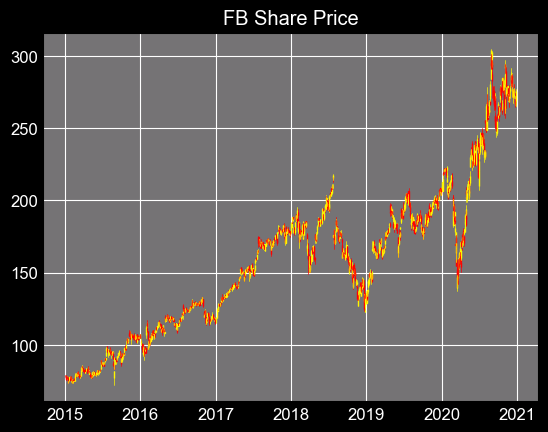

In [63]:
# Visualisation using candlestick from mpl_finance
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title('{} Share Price'.format(ticker), color='white')
ax.set_facecolor('#757375')
ax.figure.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis_date()

# Plotting The Candlestick Chart
candlestick_ohlc(ax, data.values, width=0.5, colorup='#fff700')
plt.show()

In [57]:
# screen = Tk()    # Creates the window from the imported Tkinter module.
# screen.geometry("400x400")    # Creates the size of the window.
# screen.title("Candlestick Stock Data visualiser")    # Adds title to the Windows GUI for the window.
# screen.configure(background = "#757375")

# def plotcandlestick():
#     candlestick_ohlc(ax, data.values, width=0.5, colorup='#00ff00')
#     plt.show()

# but = Button(screen, text = "press", command = plotcandlestick)
# but.pack(pady = 50)

# screen.mainloop()    # Loops the window to prevent the window disappearing after opening once.